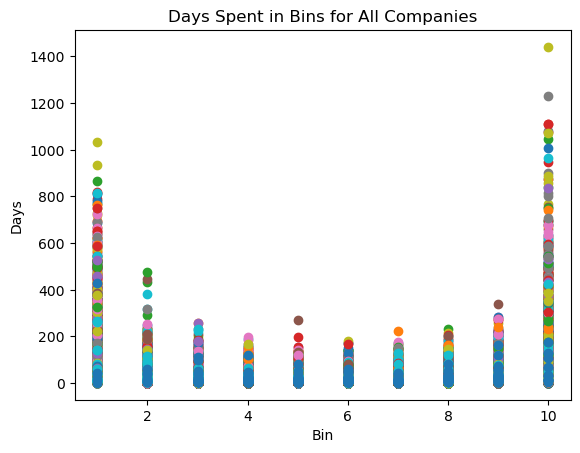

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Import data from CSV
data = pd.read_csv('Final-data-with-bins-days-R1.csv', header=None, names=['Date', 'Company', 'Bin', 'Days'])

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate over all companies
unique_companies = data['Company'].unique()
for company in unique_companies:
    # Filter data for the current company
    company_data = data[data['Company'] == company]

    # Plot the data (Bin vs. Days) for the current company
    ax.scatter(company_data['Bin'], company_data['Days'], label=company)

# Set the labels and title for the plot
ax.set_xlabel('Bin')
ax.set_ylabel('Days')
ax.set_title('Days Spent in Bins for All Companies')


# Show the plot
plt.show()

In [2]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge

In [3]:

# Filter data for the specific company
company_data = data[data['Company'] == "080b998a-8625-4e84-a82f-2d124f6eb55d"]

# Sort the data by date
company_data = company_data.sort_values(by='Date')
company_data.reset_index(drop=True, inplace=True)

# Split data into training and testing sets chronologically
n = len(company_data)
n_half = n // 2
train_data = company_data.iloc[:n_half]
test_data = company_data.iloc[n_half:]
print("TRAIN DATES:\n",train_data)
print("\nTEST DATES:\n", test_data)



TRAIN DATES:
           Date                               Company  Bin  Days
0   2015-11-05  080b998a-8625-4e84-a82f-2d124f6eb55d    3    14
1   2016-02-08  080b998a-8625-4e84-a82f-2d124f6eb55d    2    67
2   2016-02-17  080b998a-8625-4e84-a82f-2d124f6eb55d    3     7
3   2016-03-10  080b998a-8625-4e84-a82f-2d124f6eb55d    2    16
4   2016-03-24  080b998a-8625-4e84-a82f-2d124f6eb55d    3    10
5   2016-05-12  080b998a-8625-4e84-a82f-2d124f6eb55d    4    35
6   2016-05-26  080b998a-8625-4e84-a82f-2d124f6eb55d    3    10
7   2016-06-08  080b998a-8625-4e84-a82f-2d124f6eb55d    4     9
8   2016-06-22  080b998a-8625-4e84-a82f-2d124f6eb55d    5    10
9   2016-06-29  080b998a-8625-4e84-a82f-2d124f6eb55d    6     5
10  2016-07-26  080b998a-8625-4e84-a82f-2d124f6eb55d    5    19
11  2016-08-08  080b998a-8625-4e84-a82f-2d124f6eb55d    6     9
12  2016-09-28  080b998a-8625-4e84-a82f-2d124f6eb55d    7    37
13  2016-10-13  080b998a-8625-4e84-a82f-2d124f6eb55d    8    11
14  2016-10-25  080b998a-8

In [4]:
# Prepare the input features and targets for training and testing
X_train = train_data[['Bin', 'Days']].values[:-1].astype(float)
y_train_bin = train_data['Bin'].values[1:].astype(float)
y_train_days = train_data['Days'].values[1:].astype(float)
print(y_train_bin)
print(y_train_days)



[ 2.  3.  2.  3.  4.  3.  4.  5.  6.  5.  6.  7.  8.  9.  8.  9.  8.  9.
  8.  7.  8.  7.  8.  9. 10.  9.  8.  9.  8.  9.  8.  7.  6.  5.  4.  5.
  4.  5.  4.  5.  4.  5.  4.  5.]
[67.  7. 16. 10. 35. 10.  9. 10.  5. 19.  9. 37. 11.  8.  1. 98. 15. 49.
 10. 12. 15. 43.  4.  5. 14.  9. 24. 44. 14. 45. 13. 14. 12. 43.  3. 26.
 15.  9. 18. 14.  8.  5.  7.  8.]


In [5]:
X_test = test_data[['Bin', 'Days']].values[:-1].astype(float)
y_test_bin = test_data['Bin'].values[1:].astype(float)
y_test_days = test_data['Days'].values[1:].astype(float)
print(y_test_bin)
print(y_test_days)


[5. 4. 5. 4. 3. 4. 5. 6. 5. 4. 3. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 3. 2.
 3. 2. 1. 2. 3. 4. 5. 6. 5. 6. 7. 6. 7. 8. 7. 8. 7. 8. 7. 6. 5.]
[ 17.  23.  52.  11.  30.  17.  14.  25.  11.  10.  19.  10.  15. 129.
  24.   6.   4.   9.  23.  23.  30.  45.  49.   9.  25.  32.  27.  36.
  14.  19.   7.  13.   7.   9.   8.  16.   9.  40.  10.  79.   8.  41.
   6.  11.  19.]


In [6]:
# Train a Ridge regression model for bins
model_bin = Ridge(alpha=1.0)
model_bin.fit(X_train, y_train_bin)
# Train a Ridge regression model for days
model_days = Ridge(alpha=1.0)
model_days.fit(X_train, y_train_days)

Ridge()

In [7]:
# Make predictions using the testing set
y_pred_bin = model_bin.predict(X_test)
y_pred_days = model_days.predict(X_test)
# Round the predicted bins and days to the nearest integers
predicted_bins = np.round(y_pred_bin).astype(int)
predicted_days = np.round(y_pred_days).astype(int)
print(predicted_bins)
print(predicted_days)

[6 5 4 5 4 3 4 5 6 5 4 3 3 2 2 2 3 2 3 2 2 2 2 3 3 3 2 2 2 3 4 5 6 5 6 7 6
 7 8 7 7 7 8 7 6]
[ 18  19  16  10  19  13  17  19  18  20  19  16  17  14 -11  12  18  17
  17  13  14  11   9   9  17  14  12  12  11  17  17  21  21  21  22  23
  20  23  17  23   8  23  16  23  21]


In [8]:

# Replace negative predictions with 0
predicted_bins[predicted_bins < 0] = 0
predicted_days[predicted_days < 0] = 0
print(predicted_bins)
print(predicted_days)

[6 5 4 5 4 3 4 5 6 5 4 3 3 2 2 2 3 2 3 2 2 2 2 3 3 3 2 2 2 3 4 5 6 5 6 7 6
 7 8 7 7 7 8 7 6]
[18 19 16 10 19 13 17 19 18 20 19 16 17 14  0 12 18 17 17 13 14 11  9  9
 17 14 12 12 11 17 17 21 21 21 22 23 20 23 17 23  8 23 16 23 21]


In [9]:

# Calculate the mean squared error for bins and days
mae_bins = mean_absolute_error(y_test_bin, predicted_bins)
mae_days = mean_absolute_error(y_test_days, predicted_days)
mape_bins = mean_absolute_percentage_error(y_test_bin, predicted_bins)
mape_days = mean_absolute_percentage_error(y_test_days, predicted_days)

print("Mean absolute error (bins): ", mae_bins)
print("Mean absolute error (days): ", mae_days)
print("Mean absolute percentage error (bins): ", mape_bins)
print("Mean absolute percentage error (days): ", mape_days)

Mean absolute error (bins):  0.8888888888888888
Mean absolute error (days):  14.044444444444444
Mean absolute percentage error (bins):  0.36140211640211634
Mean absolute percentage error (days):  0.686002954089904


In [10]:
test_data_with_predictions = test_data.iloc[1:].copy()
test_data_with_predictions['Predicted Bin'] = predicted_bins
test_data_with_predictions['Predicted Days'] = predicted_days
test_data_with_predictions['Real Bin'] = y_test_bin.astype(int)
test_data_with_predictions['Real Days'] = y_test_days.astype(int)

In [11]:
# Reset the index and display the resulting DataFrame
test_data_with_predictions.reset_index(drop=True, inplace=True)
print(test_data_with_predictions)

          Date                               Company  Bin  Days  \
0   2019-04-08  080b998a-8625-4e84-a82f-2d124f6eb55d    5    17   
1   2019-05-09  080b998a-8625-4e84-a82f-2d124f6eb55d    4    23   
2   2019-07-22  080b998a-8625-4e84-a82f-2d124f6eb55d    5    52   
3   2019-08-06  080b998a-8625-4e84-a82f-2d124f6eb55d    4    11   
4   2019-09-17  080b998a-8625-4e84-a82f-2d124f6eb55d    3    30   
5   2019-10-10  080b998a-8625-4e84-a82f-2d124f6eb55d    4    17   
6   2019-10-30  080b998a-8625-4e84-a82f-2d124f6eb55d    5    14   
7   2019-12-04  080b998a-8625-4e84-a82f-2d124f6eb55d    6    25   
8   2019-12-19  080b998a-8625-4e84-a82f-2d124f6eb55d    5    11   
9   2020-01-02  080b998a-8625-4e84-a82f-2d124f6eb55d    4    10   
10  2020-01-29  080b998a-8625-4e84-a82f-2d124f6eb55d    3    19   
11  2020-02-12  080b998a-8625-4e84-a82f-2d124f6eb55d    2    10   
12  2020-03-04  080b998a-8625-4e84-a82f-2d124f6eb55d    1    15   
13  2020-09-01  080b998a-8625-4e84-a82f-2d124f6eb55d    2   12

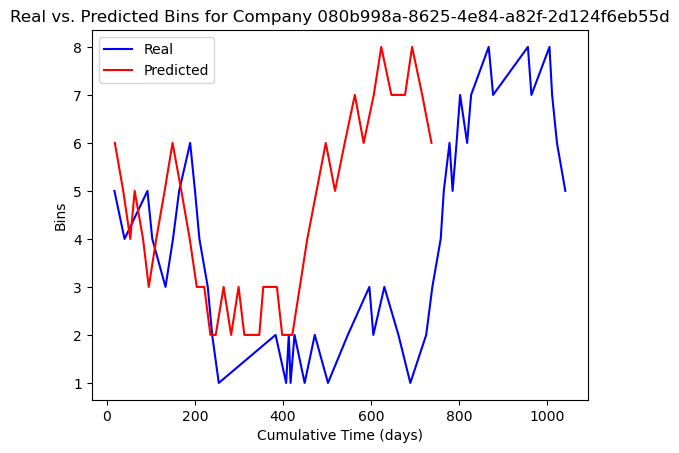

In [12]:
import matplotlib.pyplot as plt
# Crearea graficului
fig, ax = plt.subplots()

# Calcularea timpului acumulat pentru valorile reale și prezise
cumulative_time_real = np.cumsum(y_test_days)
cumulative_time_predicted = np.cumsum(predicted_days)

# Plotează valorile reale
ax.plot(cumulative_time_real, y_test_bin, label='Real', color='blue')

# Plotează valorile prezise
ax.plot(cumulative_time_predicted, predicted_bins, label='Predicted', color='red')

# Setează etichetele și titlul pentru grafic
ax.set_xlabel('Cumulative Time (days)')
ax.set_ylabel('Bins')
ax.set_title('Real vs. Predicted Bins for Company 080b998a-8625-4e84-a82f-2d124f6eb55d')
ax.legend()

# Afișează graficul
plt.show()
